In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
# Prepare the data data
boston = datasets.load_boston()
X = boston.data
y = boston.target

boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



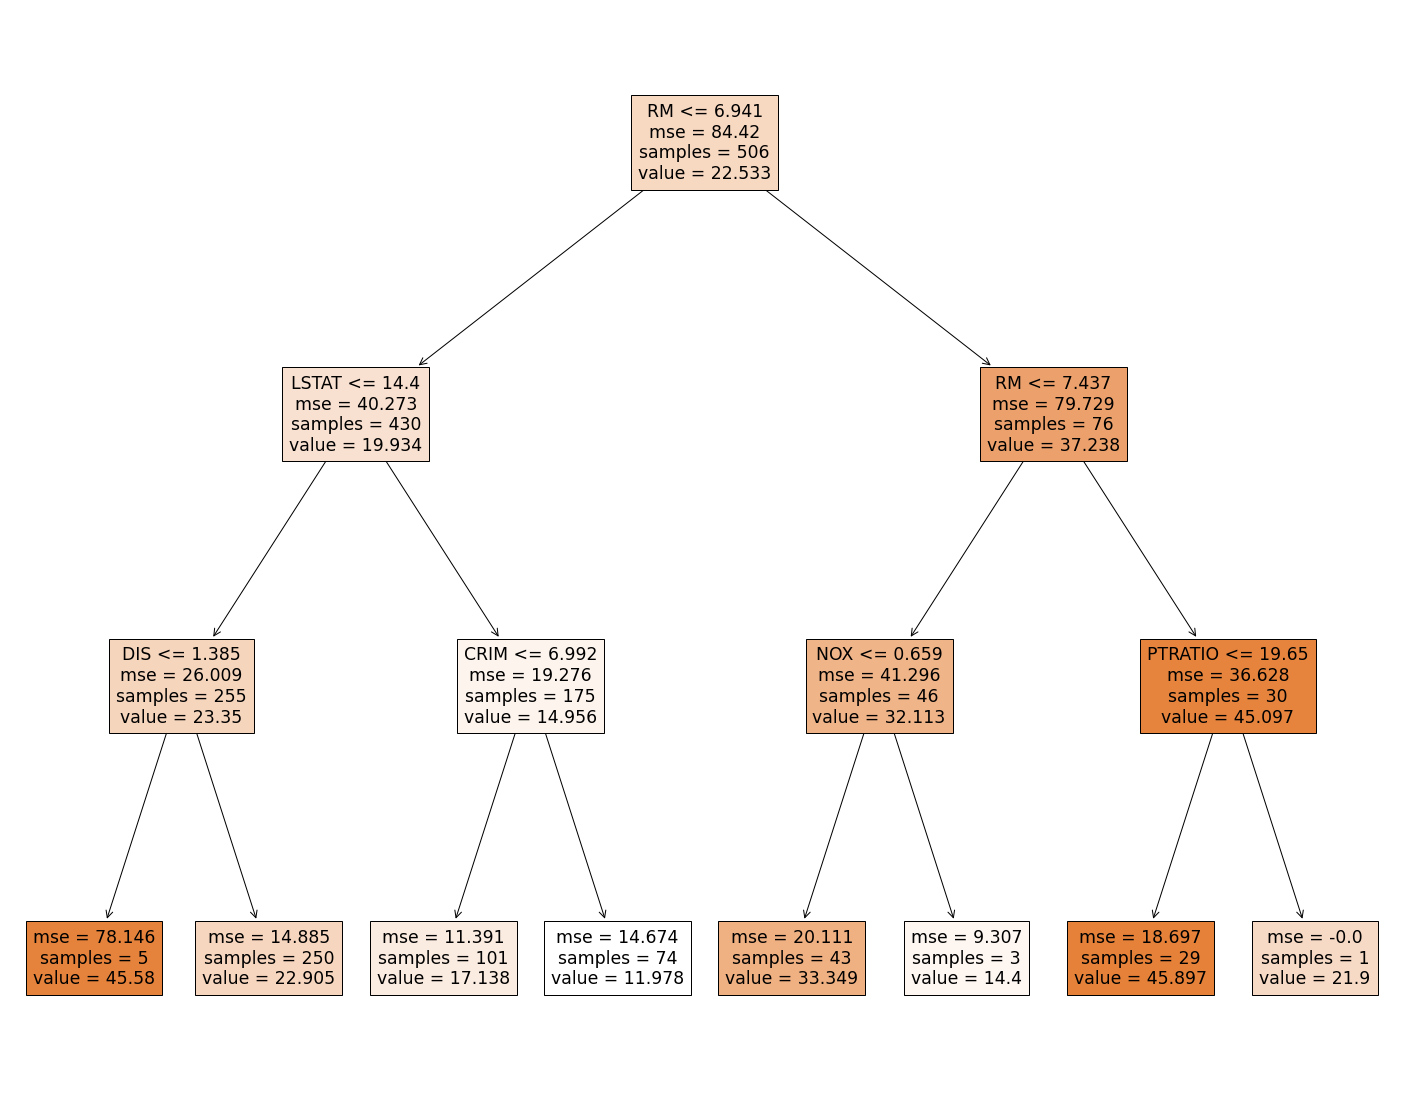

In [3]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=boston.feature_names, filled=True)

In [ ]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=boston.feature_names,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regr, X, y,
                target_name="target",
                feature_names=boston.feature_names)
viz